## Load Packages

In [1]:
#Import important packages for testing out the models throughout this jupyter notebook
#External modules needed
import seaborn as sns
import matplotlib.pyplot as pl
import pandas as pd
import os

#Experiment tumor-tcell modules needed
from tumor_tcell.experiments.main import (tumor_tcell_abm, plots_suite, get_tcells, get_tumors)
from vivarium.library.units import units, remove_units

#Analysis tumor-tcell modules needed
from tumor_tcell.library.data_process import data_to_dataframes
from tumor_tcell.library.population_analysis import division_analysis
from tumor_tcell.library.population_plots import (population_plot, division_plot, death_plot)

#Analysis tumor-tcell modules needed
from tumor_tcell.library.population_plots import death_group_plot
from tumor_tcell.library.population_plots import population_group_plot


Loading chipmunk for Linux (64bit) [/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/vivarium_env/lib/python3.8/site-packages/pymunk/libchipmunk.so]


## Experiment #1 with 1:1 ratio of T cells:Tumors with 0% PDL1+ Initial Tumors

In [2]:
##Experiment to compare to killing data 1:1 with 0 PDL1+ tumors
N_TUMORS = 50
N_TCELLS = 50
PD1n_per = 0.3
PDL1n_per = 1
DEFAULT_TUMORS = get_tumors(number=N_TUMORS, state_per=PDL1n_per)
DEFAULT_TCELLS = get_tcells(number=N_TCELLS, state_per=PD1n_per)

# global parameters
TIMESTEP = 60
BOUNDS = [250 * units.um, 250 * units.um]

data = tumor_tcell_abm(total_time=108000, tumors=DEFAULT_TUMORS, tcells=DEFAULT_TCELLS, 
                       halt_threshold=500,emit_step=60, bounds=BOUNDS,sim_step=10*TIMESTEP,)
data;

Initializing experiment tumor_tcell_20210510.160538


100%|██████████| 180/180 [05:01<00:00,  1.68s/it]


Completed in 301.65 seconds


In [3]:
data = remove_units(data)
data;

### Analysis

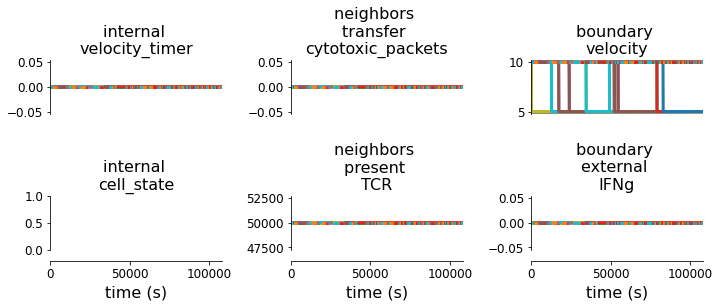

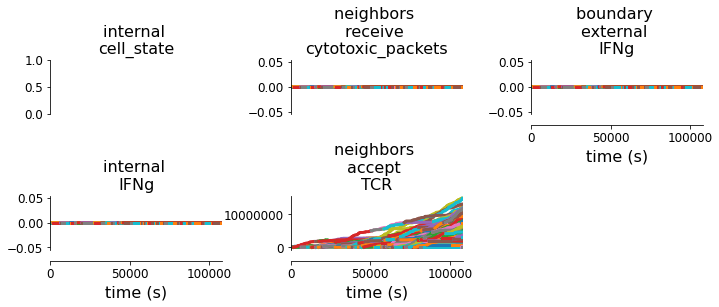

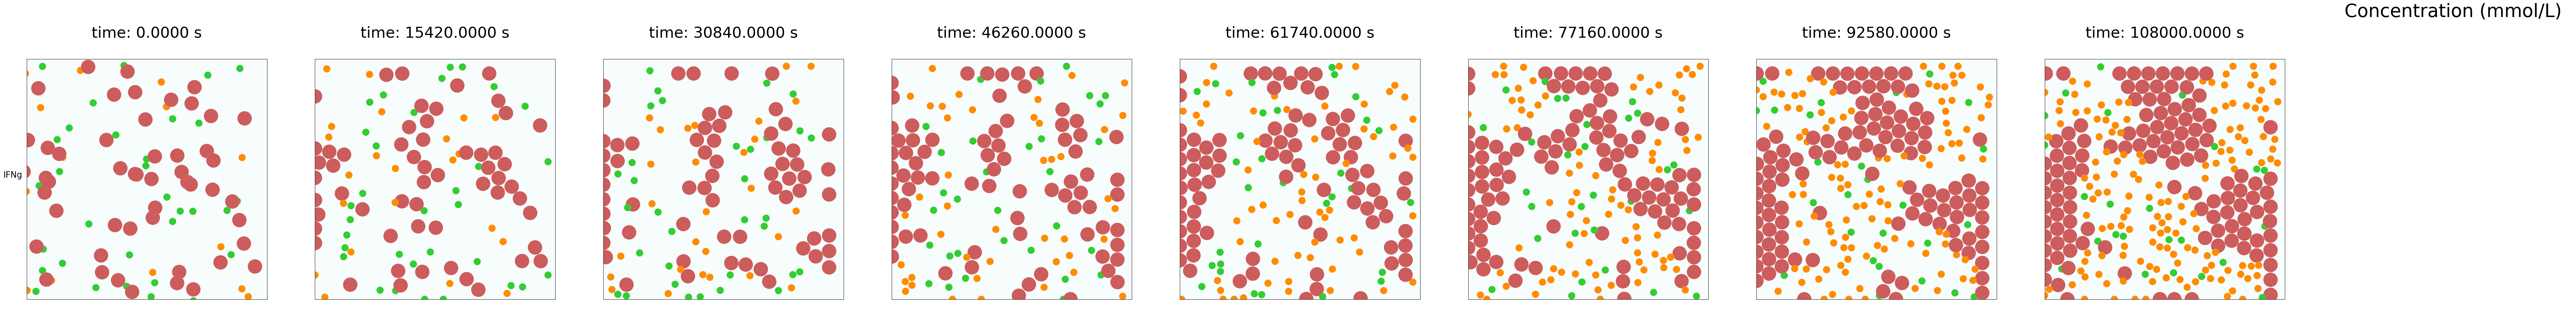

In [4]:
#Create out directory location
out_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/'

#Make a new folder to call analysis
exp_out_dir_1 = out_dir + 'PDL1n_100percent' #####################
os.makedirs(exp_out_dir_1, exist_ok=True)

#Plot the data using tumor-tcell experiment notebook and save in current directory
fig1, fig2, fig3 = plots_suite(data, out_dir = exp_out_dir_1, bounds=[b*units.um for b in BOUNDS])

In [5]:
#Extract data for plotting
df_tumor_death_1, df_tcell_death_1, tumor_plot_1, tcell_plot_1 = data_to_dataframes(data)

/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death.sort_values(by=['time'], inplace=True)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death[death_type] = df_tcell_death['death'].apply(lambda x: 1 if x == death_type else 0)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:130: SettingWithCopyWarning: 
A value is trying to 

## Experiment #2 with 1:1 ratio of T cells to Tumors with 50% PDL1+ Initial Tumors

In [6]:
##Experiment to compare to killing data 1:1 with 50% PDL1+ tumors
N_TUMORS = 50
N_TCELLS = 50
PD1n_per = 0.2
PDL1n_per = 0.5
DEFAULT_TUMORS = get_tumors(number=N_TUMORS, state_per=PDL1n_per)
DEFAULT_TCELLS = get_tcells(number=N_TCELLS, state_per=PD1n_per)

# global parameters
TIMESTEP = 60
BOUNDS = [250 * units.um, 250 * units.um]

data = tumor_tcell_abm(total_time=108000, tumors=DEFAULT_TUMORS, tcells=DEFAULT_TCELLS, 
                       halt_threshold=500,emit_step=60, bounds=BOUNDS,sim_step=10*TIMESTEP,)
data;

  0%|          | 0/180 [00:00<?, ?it/s]

Initializing experiment tumor_tcell_20210510.161453


100%|██████████| 180/180 [02:48<00:00,  1.07it/s]


Completed in 168.32 seconds


In [7]:
data = remove_units(data)
data;

### Analysis

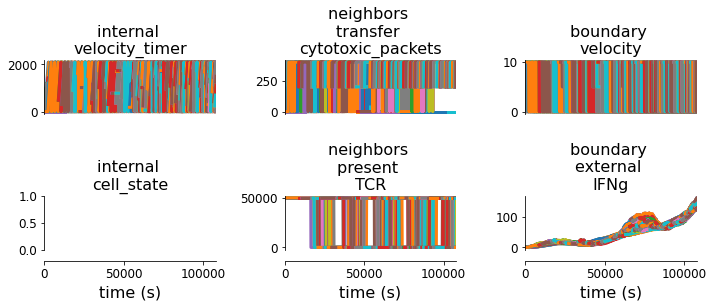

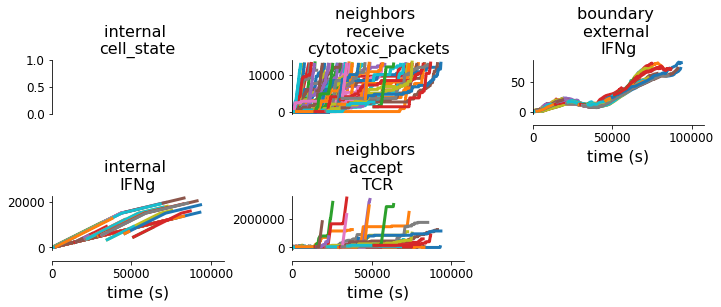

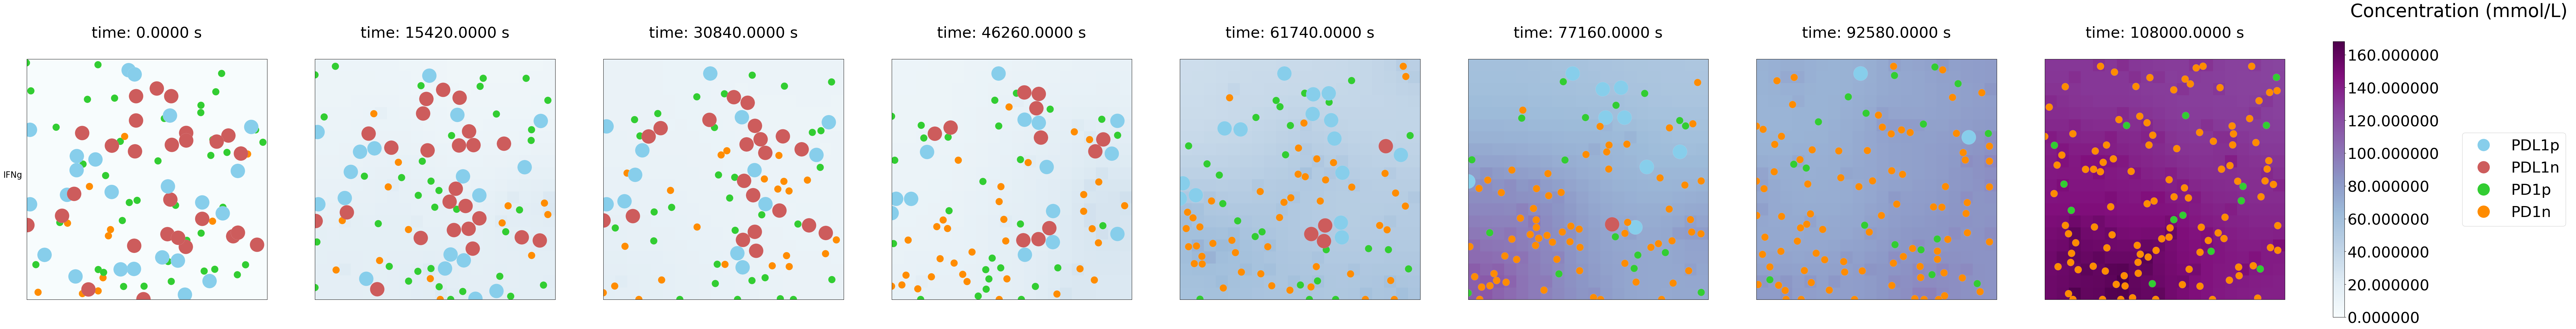

In [8]:
#Make a new folder to call analysis
exp_out_dir_2 = out_dir + 'PDL1n_0percent' #####################
os.makedirs(exp_out_dir_2, exist_ok=True)

#Plot the data using tumor-tcell experiment notebook and save in current directory
fig1, fig2, fig3 = plots_suite(data, out_dir = exp_out_dir_2, bounds=[b*units.um for b in BOUNDS])

In [9]:
#Extract data for plotting
df_tumor_death_2, df_tcell_death_2, tumor_plot_2, tcell_plot_2 = data_to_dataframes(data)

## Analyze together

In [11]:
#Add experimental Tag to each dataframe
df_tcell_death_1['experiment_name'] = '100% PDL1+'
df_tumor_death_1['experiment_name'] = '100% PDL1+'
tcell_plot_1['experiment_name'] = '100% PDL1+'
tumor_plot_1['experiment_name'] = '100% PDL1+'

df_tcell_death_2['experiment_name'] = '50% PDL1+'
df_tumor_death_2['experiment_name'] = '50% PDL1+'
tcell_plot_2['experiment_name'] = '50% PDL1+'
tumor_plot_2['experiment_name'] = '50% PDL1+'

In [12]:
#Make a new folder to call analysis
exp_out_dir_3 = out_dir + 'killing_PDL1_100_PDL1_0' #####################
os.makedirs(exp_out_dir_3, exist_ok=True)

#Cobmine together in list form for analysis together
df_tcell_death_list = [df_tcell_death_1,df_tcell_death_2]
df_tumor_death_list = [df_tumor_death_1,df_tumor_death_2]
tcell_plot_list = [tcell_plot_1,tcell_plot_2]
tumor_plot_list = [tumor_plot_1,tumor_plot_2]

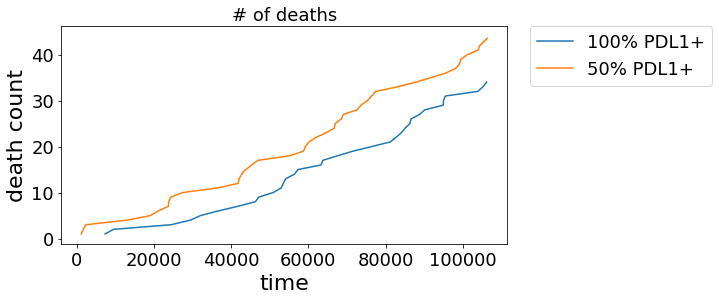

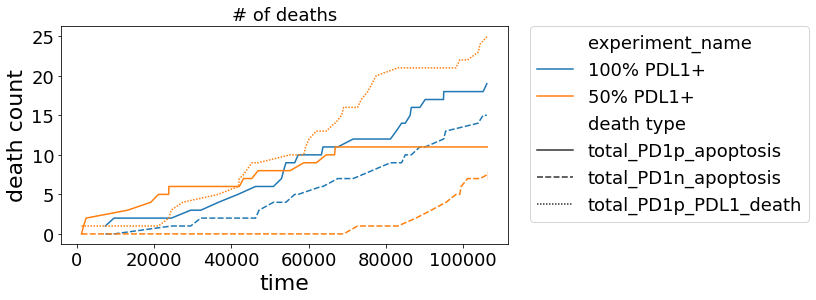

In [13]:
death_group_plot(death_plot_list = df_tcell_death_list, out_dir=exp_out_dir_3, save_name='Tcells')

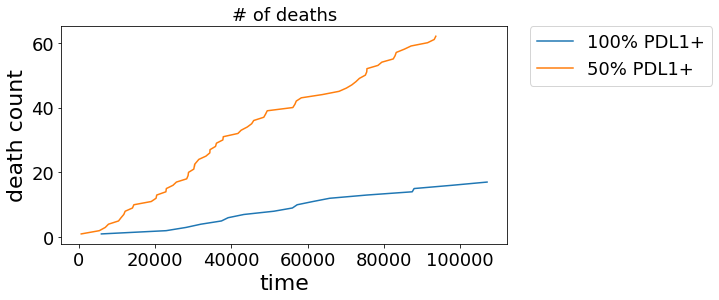

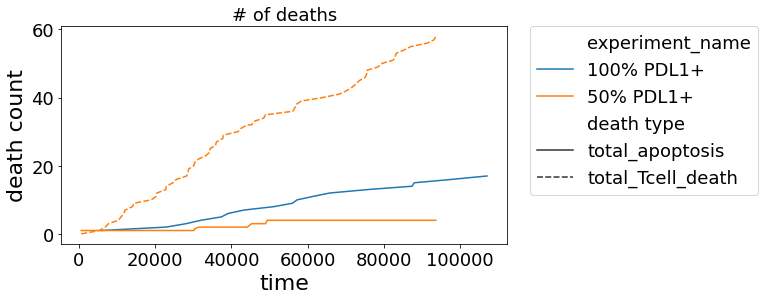

In [14]:
death_group_plot(death_plot_list = df_tumor_death_list, out_dir=exp_out_dir_3, save_name='Tumors')

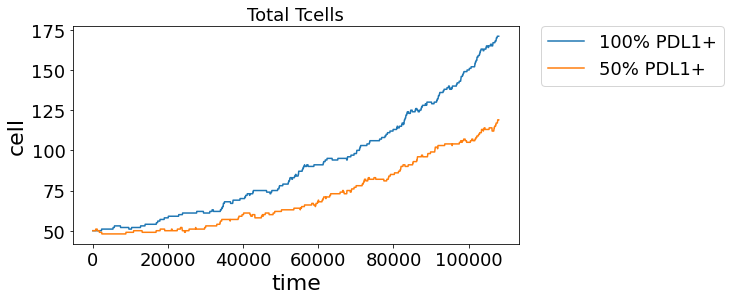

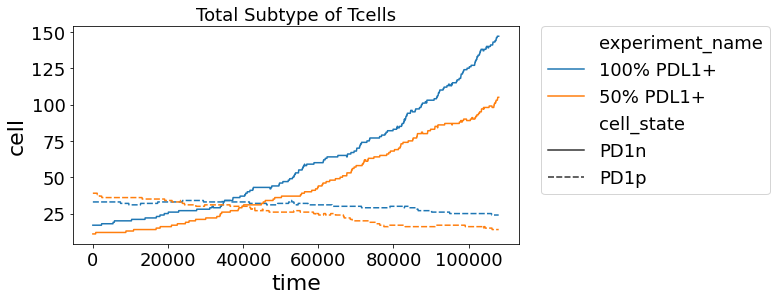

In [15]:
population_group_plot(cell_plot_list = tcell_plot_list, cell_states = ['PD1n','PD1p'], out_dir=exp_out_dir_3, save_name='Tcells')

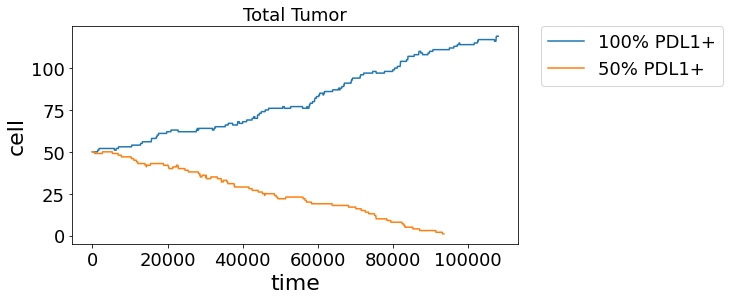

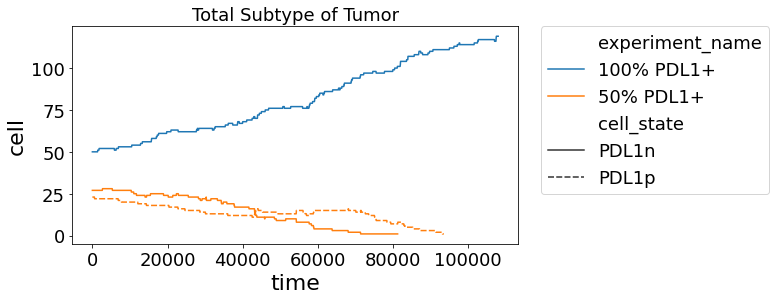

In [16]:
population_group_plot(cell_plot_list = tumor_plot_list, cell_states = ['PDL1n','PDL1p'], out_dir=exp_out_dir_3, save_name='Tumor')